In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style('whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/MyDrive/Univerui/Kursinis/'

# Loading in data

In [ ]:
malmem = pd.read_csv(path + 'Obfuscated-MalMem2022.csv')
malmem.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


# First insights

In [ ]:
print(f'Dataset consist of {malmem.shape[0]} rows and {malmem.shape[1]} columns')

Dataset consist of 58596 rows and 57 columns


In [ ]:
malmem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58596 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58596 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

In [ ]:
# Save info output to excel file for easier work with the columns
import io
buffer = io.StringIO()
malmem.info(buf=buffer)
lines = buffer.getvalue().splitlines()
df = (pd.DataFrame([x.split() for x in lines[5:-2]], columns=lines[3].split())
       .drop('Count',axis=1)
       .rename(columns={'Non-Null':'Non-Null Count'}))
df.to_excel('info.xls')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  


In [ ]:
# Checking missing values
malmem.columns[malmem.isnull().any()]

Index([], dtype='object')

In [ ]:
# Checking object column Category unique values
malmem.Category.nunique()

28346

In [ ]:
# Sampling object column 5 random values
malmem.Category.sample(n=5)

22464                                               Benign
3984                                                Benign
38536    Spyware-CWS-0c445ca2165e332cfdc866b200aaf2deae...
2404                                                Benign
55329    Ransomware-Ako-0ae4fbcdbb9505460be437c2633a500...
Name: Category, dtype: object

In [ ]:
categories = malmem.Category.str.split('-',expand=True).iloc[:,:2]
categories.columns = ['type', 'family']
malware_df = categories[~categories.iloc[:,0].str.contains('Benign', case=False)]
malware_df.columns = ['type', 'family']
malware_df.head()

,type,family
29298,Ransomware,Ako
29299,Ransomware,Ako
29300,Ransomware,Ako
29301,Ransomware,Ako
29302,Ransomware,Ako


In [ ]:
categories['type'].value_counts()

Benign        29298
Spyware       10020
Ransomware     9791
Trojan         9487
Name: type, dtype: int64

In [ ]:
categories.groupby(['type', 'family']).size()

type        family      
Ransomware  Ako             2000
            Conti           1988
            Maze            1958
            Pysa            1717
            Shade           2128
Spyware     180solutions    2000
            CWS             2000
            Gator           2200
            TIBS            1410
            Transponder     2410
Trojan      Emotet          1967
            Reconyc         1570
            Refroso         2000
            Scar            2000
            Zeus            1950
dtype: int64

This column can be useful for continuation of the work and instead of binary classification try to predict malware category or malware family.

In [ ]:
malmem.Class.value_counts()

Benign     29298
Malware    29298
Name: Class, dtype: int64

In [ ]:
# Checking uniq
print(f'Column `Class` has {malmem.Class.nunique()} unique values' +
      f' with values being {malmem.Class.unique()}')


Column `Class` has 2 unique values with values being ['Benign' 'Malware']


Column `Class` will be used for malware classification. Meanwhile Category column is going to be dropped because it has too many unique values.

In [ ]:
malmem.nunique()

Category                                  28346
pslist.nproc                                114
pslist.nppid                                 49
pslist.avg_threads                        27885
pslist.nprocs64bit                            1
pslist.avg_handlers                       36463
dlllist.ndlls                              1860
dlllist.avg_dlls_per_proc                 16319
handles.nhandles                           7674
handles.avg_handles_per_proc              36144
handles.nport                                 1
handles.nfile                              1149
handles.nevent                             3469
handles.ndesktop                             64
handles.nkey                               1100
handles.nthread                            1170
handles.ndirectory                          108
handles.nsemaphore                          638
handles.ntimer                              129
handles.nsection                            629
handles.nmutant                         

In [ ]:
columns_to_drop = list(malmem.columns[malmem.nunique() == 1])
columns_to_drop

['pslist.nprocs64bit', 'handles.nport', 'svcscan.interactive_process_services']

Columns `pslist.nprocs64bit`, `handles.nport`,`svcscan.interactive_process_services` Contains a single value in a column and for that reason it will be removed.

In [ ]:
columns_to_drop.append('Category')
columns_to_drop

['pslist.nprocs64bit',
 'handles.nport',
 'svcscan.interactive_process_services',
 'Category']

In [ ]:
print(f'Number of columns before dropping {malmem.shape[1]}.')
malmem.drop(columns_to_drop, axis=1, inplace=True)
print(f'Number of columnss after dropping {malmem.shape[1]}.')

Number of columns before dropping 57.
Number of columnss after dropping 53.


In [ ]:
# Checking the class samples present in the dataset
malmem.Class.value_counts()

Benign     29298
Malware    29298
Name: Class, dtype: int64

# Visualisations

In [ ]:
palette = {'Benign':'tab:green', 'Malware':'tab:red'}

## Distributions

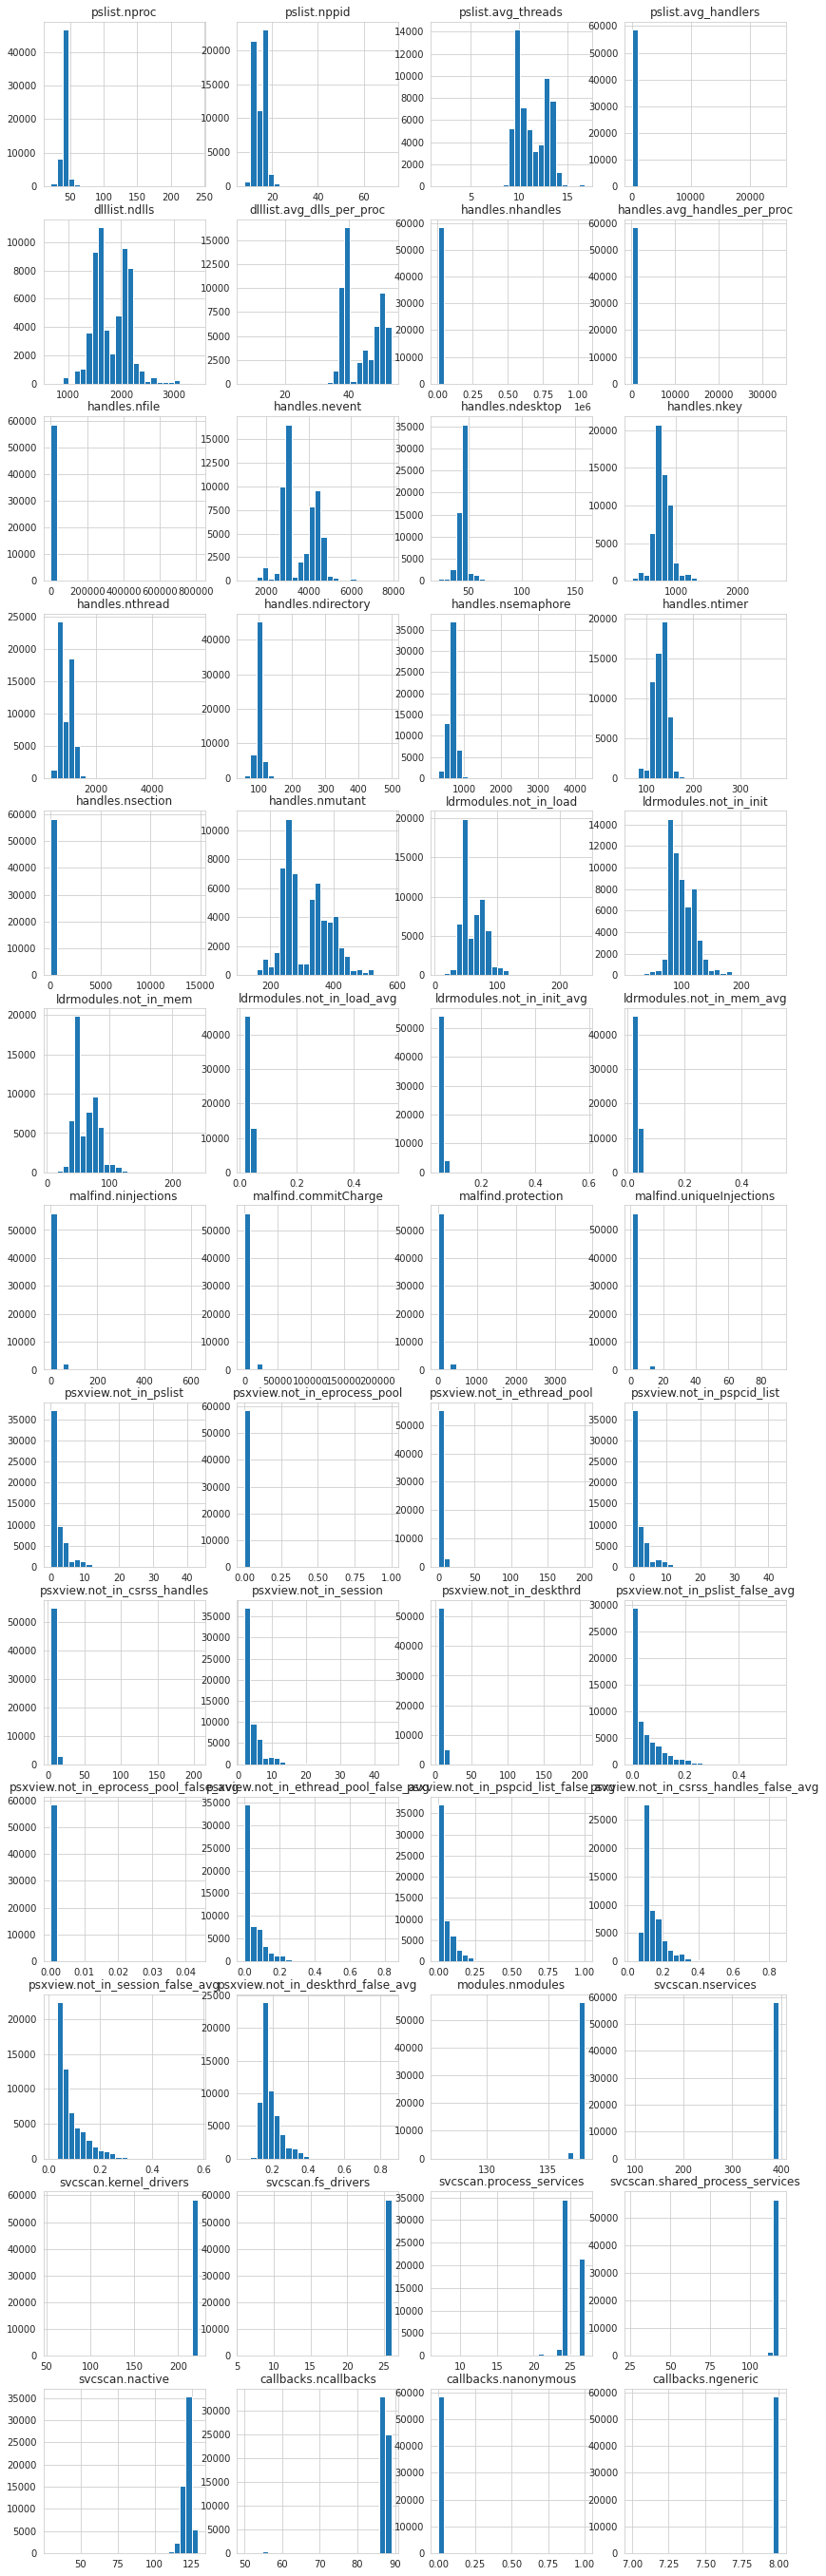

In [ ]:
fig,ax = plt.subplots(13, 4, figsize=(14,49))

for i, var in enumerate(malmem.iloc[:,:-1]):
    plt.subplot(13, 4, i+1)
    ax=plt.gca()
    ax.set_title(var)
    ax.hist(malmem.loc[:][var], bins=25)

## Correlation

In [ ]:
malmem_corr = malmem.iloc[:, :-1].corr(method='kendall')

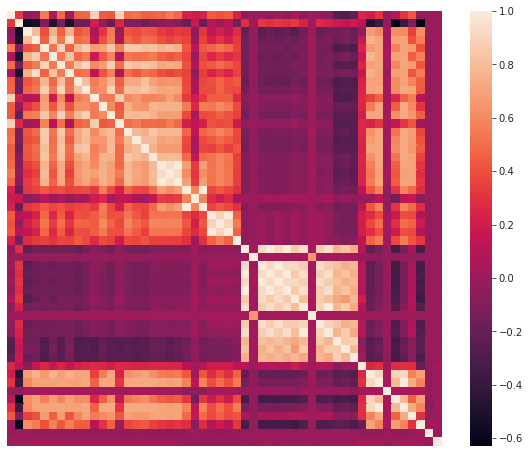

In [ ]:
f, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(malmem_corr, square=True, yticklabels=False, xticklabels=False)

## t-SNE

In [ ]:
from sklearn.manifold import TSNE
m = TSNE(learning_rate=50)

tsne_features = m.fit_transform(malmem.iloc[:,:-1])


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [ ]:
m_2 = TSNE(learning_rate=500)

tsne_features_2 = m_2.fit_transform(malmem.iloc[:,:-1])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [ ]:
m_3 = TSNE(learning_rate=5000)

tsne_features_3 = m_3.fit_transform(malmem.iloc[:,:-1])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [ ]:
m_4 = TSNE(learning_rate=5000, perplexity=100)

tsne_features_4 = m_4.fit_transform(malmem.iloc[:,:-1])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [ ]:
df = pd.DataFrame({'x':tsne_features[:,0], 'y':tsne_features[:,1],
                   'x_2':tsne_features_2[:,0], 'y_2':tsne_features_2[:,1],
                   'x_3':tsne_features_3[:,0], 'y_3':tsne_features_3[:,1],
                   'x_4':tsne_features_4[:,0], 'y_4':tsne_features_4[:,1]})

df.to_csv(path+'tsne_results_2.csv')

In [ ]:
df = pd.read_csv(path+'tsne_results_2.csv')

Text(0.5, 1.0, 'LR=5000, Perlexity=100')

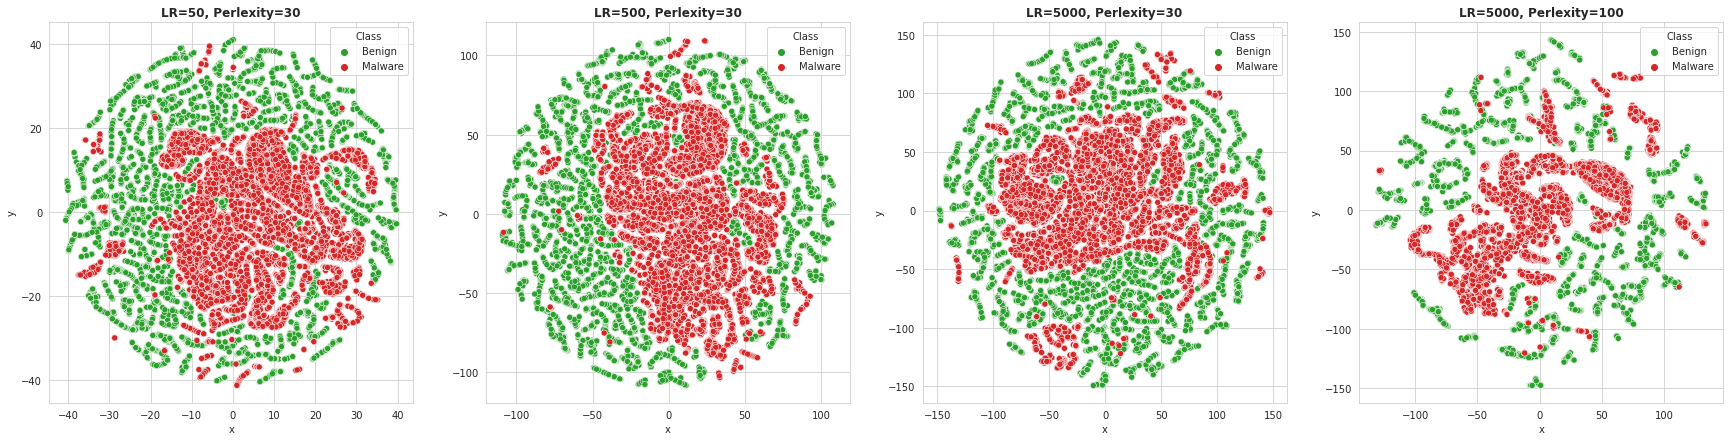

In [ ]:
fig, axes = plt.subplots(1,4,figsize=(30,7))

sns.scatterplot(ax=axes[0], x='x', y='y', data=df, hue=malmem.iloc[:,-1], palette=palette)
axes[0].set_ylabel('y')
axes[0].set_xlabel('x')
axes[0].set_title('LR=50, Perlexity=30', weight='bold')

sns.scatterplot(ax=axes[1], x='x_2', y='y_2', data=df, hue=malmem.iloc[:,-1], palette=palette)
axes[1].set_ylabel('y')
axes[1].set_xlabel('x')
axes[1].set_title('LR=500, Perlexity=30', weight='bold')

sns.scatterplot(ax=axes[2], x='x_3', y='y_3', data=df, hue=malmem.iloc[:,-1], palette=palette)
axes[2].set_ylabel('y')
axes[2].set_xlabel('x')
axes[2].set_title('LR=5000, Perlexity=30', weight='bold')

sns.scatterplot(ax=axes[3], x='x_4', y='y_4', data=df, hue=malmem.iloc[:,-1], palette=palette)
axes[3].set_ylabel('y')
axes[3].set_xlabel('x')
axes[3].set_title('LR=5000, Perlexity=100', weight='bold')

## Feature visualisation

Text(0.5, 1.0, 'Tėvinių procesų ir jų užkraunanų bibliotekų skaičius')

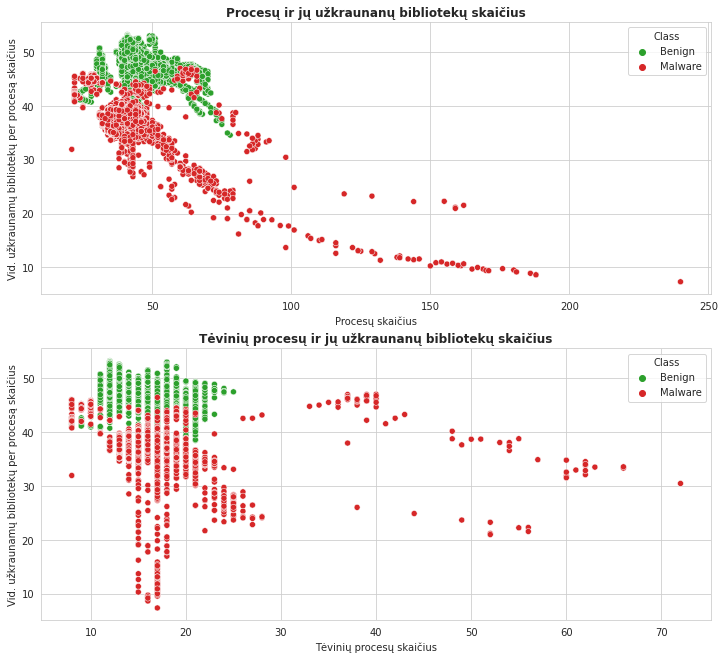

In [ ]:
fig, axes = plt.subplots(2,1,figsize=(12,11))

sns.scatterplot(ax=axes[0], x=malmem['pslist.nproc'], y=malmem['dlllist.avg_dlls_per_proc'], hue=malmem['Class'], palette=palette)
axes[0].set_ylabel('Vid. užkraunamų bibliotekų per procesą skaičius')
axes[0].set_xlabel('Procesų skaičius')
axes[0].set_title('Procesų ir jų užkraunanų bibliotekų skaičius', weight='bold')

sns.scatterplot(ax=axes[1], x=malmem['pslist.nppid'], y=malmem['dlllist.avg_dlls_per_proc'], hue=malmem['Class'], palette=palette)
axes[1].set_ylabel('Vid. užkraunamų bibliotekų per procesą skaičius')
axes[1].set_xlabel('Tėvinių procesų skaičius')
axes[1].set_title('Tėvinių procesų ir jų užkraunanų bibliotekų skaičius', weight='bold')

In [ ]:
family_counts = categories.groupby(['type', 'family']).size()

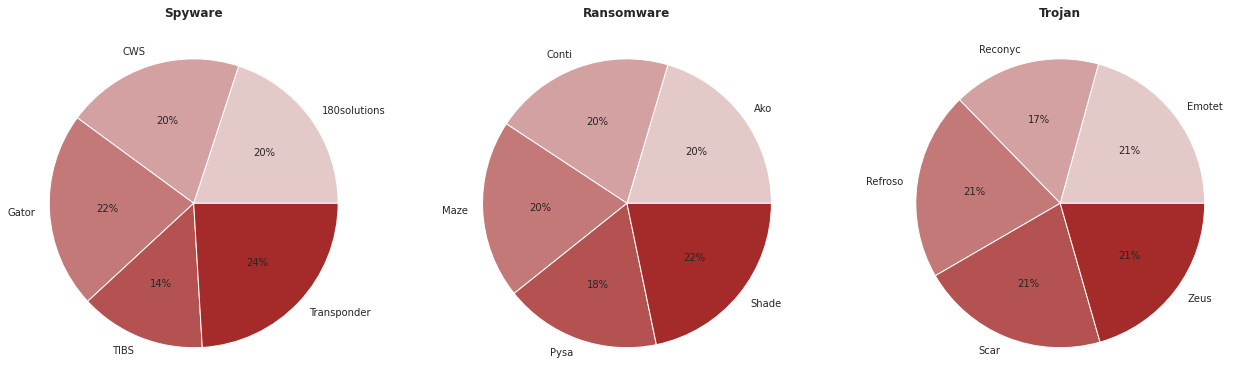

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(22,22))
axes = axes.flat
colors = sns.light_palette('brown')[1:]
for idx, ax in zip(set(family_counts.index.get_level_values(0)), axes):
  ax.pie(family_counts.loc[idx], labels=family_counts.loc[idx].index, autopct='%.0f%%', colors=colors)
  ax.set_title(idx, fontweight="bold")

([<matplotlib.patches.Wedge at 0x7faa5d2b6610>,
 [Text(-1.1, 1.3471114790620887e-16, 'Benign'),
  Text(0.5629215585911537, -0.9450499028481546, 'Ransomware'),
  Text(1.0995508907927858, 0.031429899089745646, 'Spyware'),
  Text(0.5356891619218855, 0.9607482093657151, 'Trojan')],
 [Text(-0.6, 7.347880794884119e-17, '50%'),
  Text(0.307048122867902, -0.5154817651899025, '17%'),
  Text(0.5997550313415194, 0.01714358132167944, '17%'),
  Text(0.29219408832102844, 0.5240444778358445, '16%')])

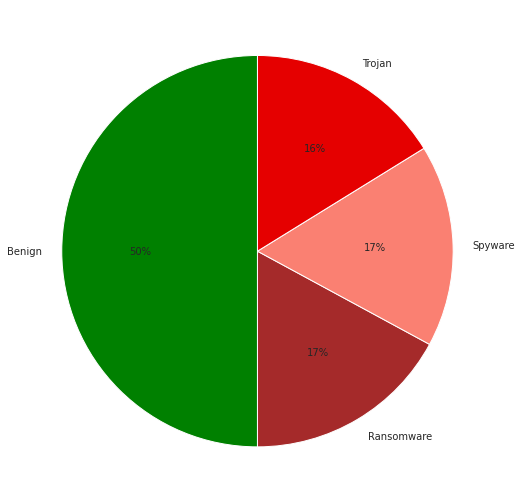

In [ ]:
fig = plt.subplots(figsize=(9,9))
colors = ['#008000', '#A52A2A', '#FA8072', '#E50000']
plt.pie(categories['type'].value_counts(), labels=categories['type'].unique(),
        autopct='%.0f%%', startangle=90, colors=colors)

# Outliers

In [ ]:
from scipy import stats

Q1 = malmem.iloc[:,:-1].quantile(.25)
Q3 = malmem.iloc[:,:-1].quantile(.75)

IQR = Q3 - Q1

mask = (malmem.iloc[:,:-1] < (Q1 - 1.5 * IQR)) | (malmem.iloc[:,:-1] > (Q3 + 1.5 * IQR))

after_malmem = malmem.iloc[:,:-1][~(mask).any(axis=1)]
print(f'Before removing outliers: {len(malmem)}')
print(f'After removing outliers: {len(after_malmem)}')

Before removing outliers: 58596
After removing outliers: 40807


In [ ]:
original_rows = malmem.shape[0]
atleast_one = after_malmem.shape[0]
more_than_3 = malmem[(mask.sum(axis=1) < 3).values].shape[0]
more_than_5 = malmem[(mask.sum(axis=1) < 5).values].shape[0]
more_than_10 = malmem[(mask.sum(axis=1) < 10).values].shape[0]
more_than_15 = malmem[(mask.sum(axis=1) < 15).values].shape[0]

print(f'Original rows: \t {original_rows}')
print(f'Atleast one column of outliers: {original_rows-atleast_one}')
print(f'More than 3 columns of outliers: {original_rows-more_than_3}')
print(f'More than 5 columns of outliers: {original_rows-more_than_5}')
print(f'More than 10 columns of outliers: {original_rows-more_than_10}')
print(f'More than 15 columns of outliers: {original_rows-more_than_15}')

Original rows: 	 58596
Atleast one column of outliers: 17789
More than 3 columns of outliers: 13063
More than 5 columns of outliers: 8205
More than 10 columns of outliers: 3921
More than 15 columns of outliers: 610
